In [6]:
import yfinance as yf

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

In [8]:
# Load Tesla stock data
print("Downloading Tesla stock data...")
data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')
print("Data downloaded successfully!")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Display data types and basic info
print("\nDataset Info:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully!

First 5 rows of the dataset:
Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1006 non-null   float64
 1   (High, TSLA)    1006 non-null   float64
 2   (Low, TSLA)     1006 non-null   float64
 3   (Open, TSLA)    1006 non-null   float64
 4 

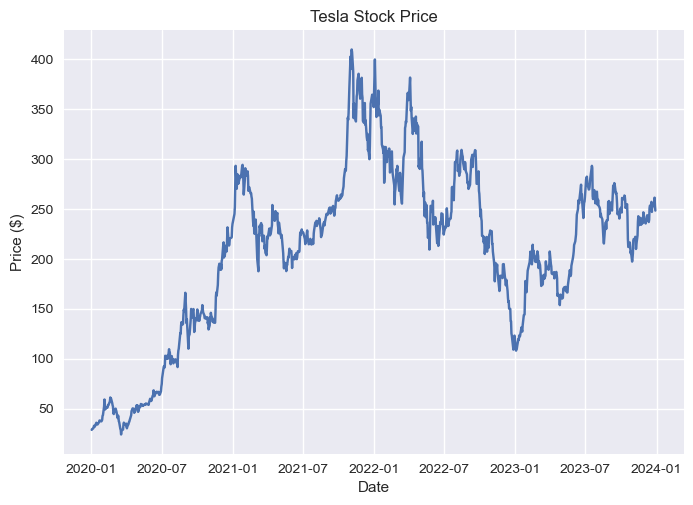

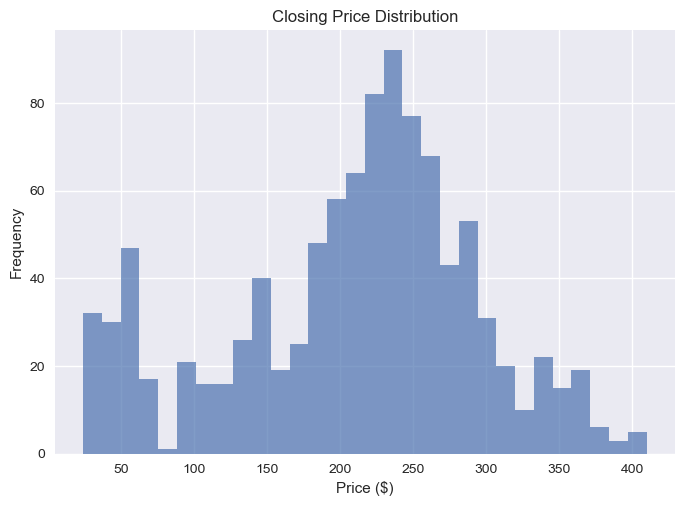

In [9]:
# 2. Plot closing price
plt.plot(data['Close'])
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot histogram
plt.hist(data['Close'], bins=30, alpha=0.7)
plt.title('Closing Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

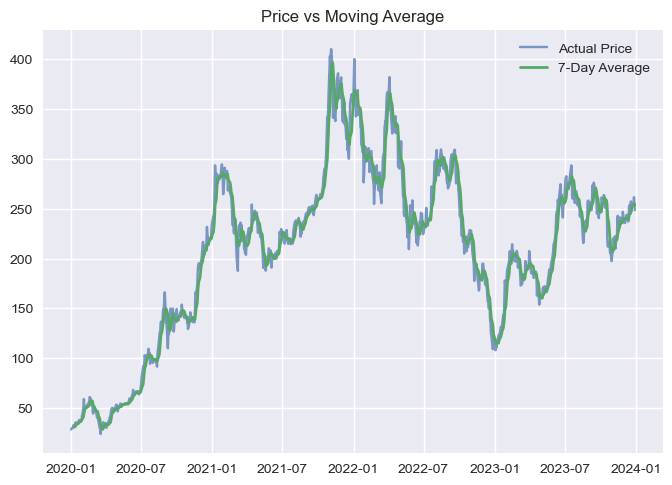

Moving Average helps smooth out daily ups and downs to see the overall trend.


In [10]:
# 3. Calculate and plot moving average
data['MA_7'] = data['Close'].rolling(7).mean()

plt.plot(data['Close'], label='Actual Price', alpha=0.7)
plt.plot(data['MA_7'], label='7-Day Average', linewidth=2)
plt.title('Price vs Moving Average')
plt.legend()
plt.show()

print("Moving Average helps smooth out daily ups and downs to see the overall trend.")

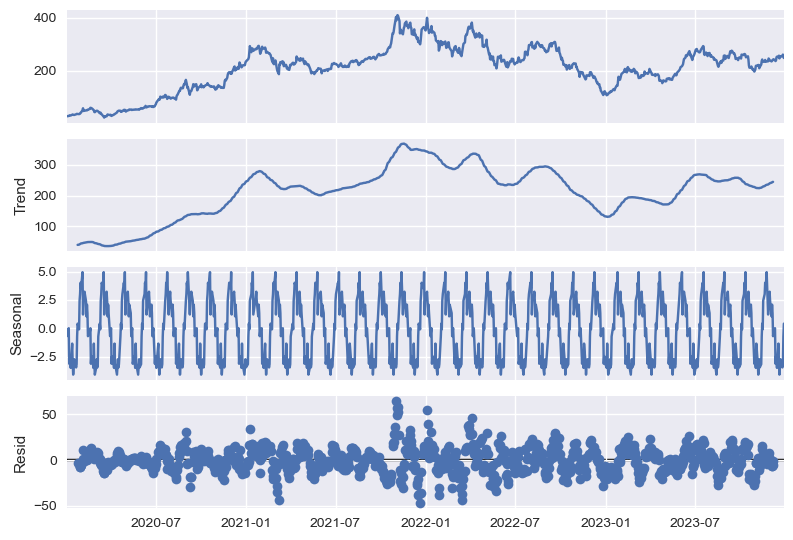


Decomposition shows:
- Trend: Overall direction (up/down)
- Seasonal: Repeatable patterns
- Residual: Random noise



In [11]:
# 4. Break down the price pattern
decomposition = seasonal_decompose(data['Close'].dropna(), period=30)

# Plot all components
decomposition.plot()
plt.show()

print("""
Decomposition shows:
- Trend: Overall direction (up/down)
- Seasonal: Repeatable patterns
- Residual: Random noise
""")


Training ARIMA model...


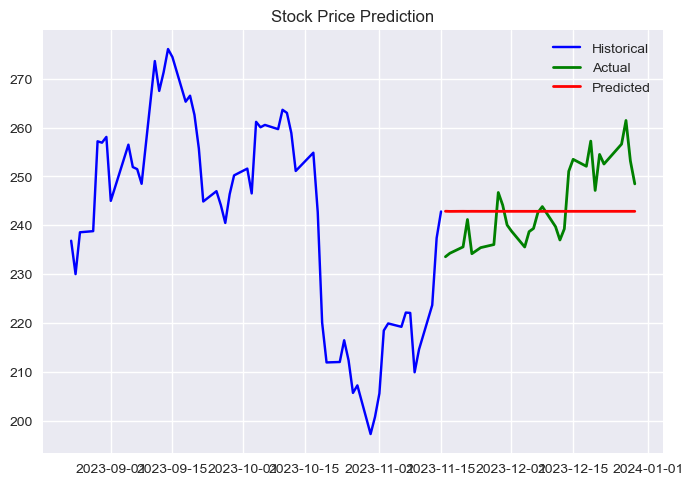

TypeError: unsupported format string passed to Series.__format__

In [12]:
# 6. ARIMA Forecasting (simplified)
print("Training ARIMA model...")

# Split data
train = data['Close'].iloc[:-30]  # All except last 30 days
test = data['Close'].iloc[-30:]   # Last 30 days for testing

# Build and train model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Make predictions
forecast = fitted_model.forecast(30)

# Plot results
plt.plot(train.index[-60:], train.tail(60), label='Historical', color='blue')
plt.plot(test.index, test.values, label='Actual', color='green', linewidth=2)
plt.plot(test.index, forecast, label='Predicted', color='red', linewidth=2)
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# Calculate error
error = abs(forecast - test).mean()
print(f"Average prediction error: ${error:.2f}")

print("""
Model Performance:
- Red line shows our predictions
- Green line shows what actually happened
- The closer they are, the better our model
""")

[*********************100%***********************]  1 of 1 completed


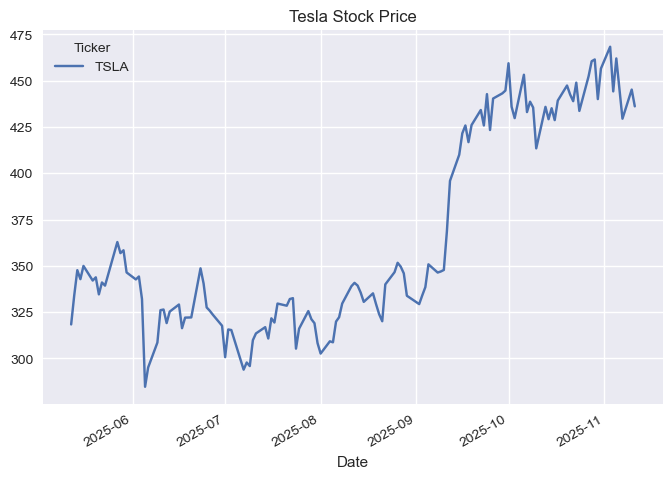

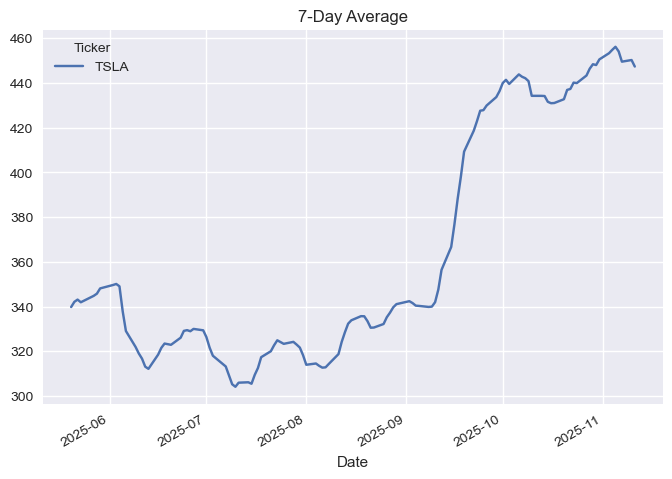

Next 10 days prediction:
128    437.256115
129    437.423713
130    437.450060
131    437.454202
132    437.454853
133    437.454956
134    437.454972
135    437.454974
136    437.454975
137    437.454975
Name: predicted_mean, dtype: float64


In [13]:
# SUPER SIMPLE VERSION

# 1. Get data
data = yf.download('TSLA', period='6mo')

# 2. Plot
data['Close'].plot(title='Tesla Stock Price')
plt.show()

# 3. Moving average
data['Close'].rolling(7).mean().plot(title='7-Day Average')
plt.show()

# 4. Simple prediction
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(1,1,1))
fitted = model.fit()
future_prices = fitted.forecast(10)

print("Next 10 days prediction:")
print(future_prices)

Training data: 98 days
Testing data: 30 days

Fitting ARIMA(1,0,0) model...
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                   98
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -377.996
Date:                Tue, 11 Nov 2025   AIC                            761.993
Time:                        21:20:41   BIC                            769.748
Sample:                             0   HQIC                           765.129
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        358.8195     36.238      9.902      0.000     287.795     429.844
ar.L1          0.9736      0.030     32.069      0.000 

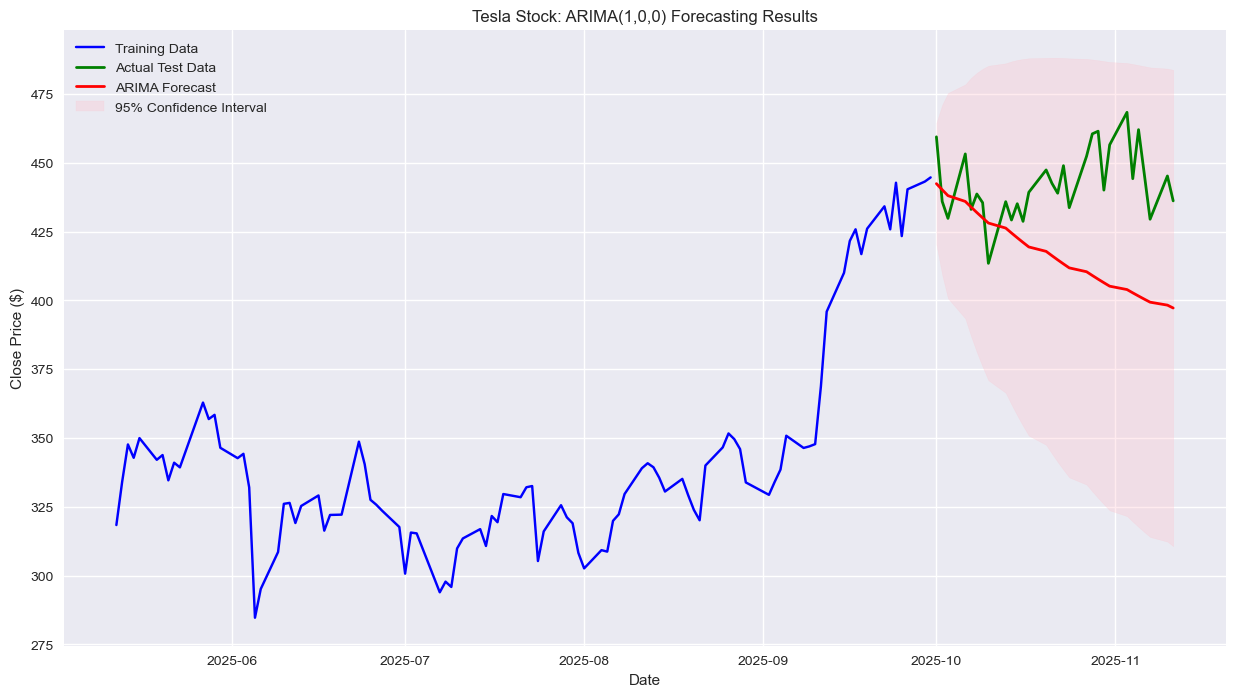

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

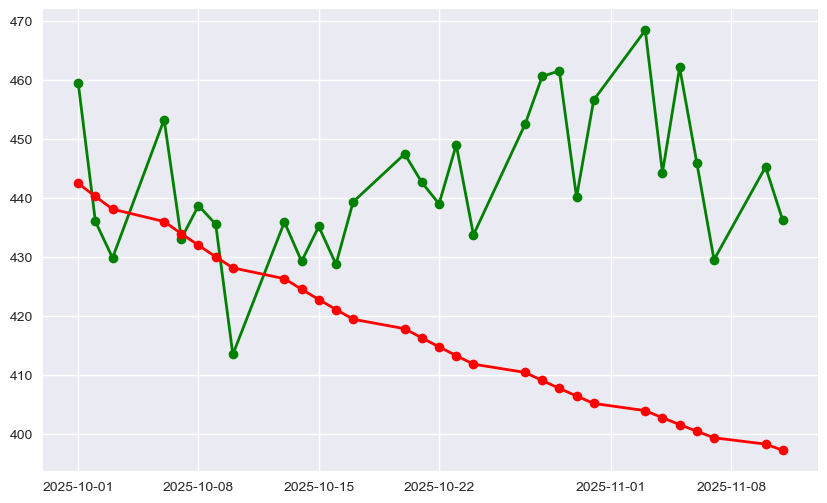

In [15]:
# Prepare data for ARIMA modeling
# We'll use the last 30 days for testing
train_size = len(data) - 30
train_data = data['Close'].iloc[:train_size]
test_data = data['Close'].iloc[train_size:]

print(f"Training data: {len(train_data)} days")
print(f"Testing data: {len(test_data)} days")

# Fit ARIMA(1,0,0) model
print("\nFitting ARIMA(1,0,0) model...")
model = ARIMA(train_data, order=(1, 0, 0))
fitted_model = model.fit()

# Display model summary
print(fitted_model.summary())

# Forecast next 30 days
forecast = fitted_model.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calculate MAE
mae = mean_absolute_error(test_data, forecast_values)
print(f"\nMean Absolute Error (MAE): ${mae:.2f}")

# Plot results
plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Plot test data
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', linewidth=2)

# Plot forecast
plt.plot(test_data.index, forecast_values, label='ARIMA Forecast', color='red', linewidth=2)

# Plot confidence intervals
plt.fill_between(test_data.index, 
                confidence_intervals.iloc[:, 0], 
                confidence_intervals.iloc[:, 1], 
                color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Tesla Stock: ARIMA(1,0,0) Forecasting Results')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Additional visualization: Forecast vs Actual
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, 'go-', label='Actual Prices', linewidth=2)
plt.plot(test_data.index, forecast_values.values, 'ro-', label='Predicted Prices', linewidth=2)

for i, (actual, pred) in enumerate(zip(test_data.values, forecast_values.values)):
    plt.plot([test_data.index[i], test_data.index[i]], [actual, pred], 'k--', alpha=0.5)

plt.title('Forecast vs Actual Prices (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()




### Model Performance Analysis:
     - Mean Absolute Error: ${mae:.2f}
     - This means on average, our predictions are ${mae:.2f} away from actual prices

Is the forecast reasonable?
- The forecast seems to follow the general trend but may miss short-term fluctuations
- Stock prices are influenced by many factors (news, market sentiment, etc.)

Potential Issues:
1. OVERFITTING: If model learns noise instead of pattern
   - Our simple ARIMA(1,0,0) is less likely to overfit

2. UNDERFITTING: If model is too simple to capture patterns
   - ARIMA(1,0,0) might be too simple for volatile stocks

Suggestions for Improvement:
- Try different ARIMA parameters (p,d,q)
- Include more features (Volume, Open price, etc.)
- Use more sophisticated models like SARIMA or Prophet
- Consider external factors (news sentiment, market indices)
